In [33]:
from google.colab import files
imagesUploaded = files.upload() # uploading images from computer

Saving im1.png to im1 (2).png
Saving im2.png to im2 (2).png
Saving im3.png to im3 (2).png
Saving im4.png to im4 (2).png
Saving im5.png to im5 (2).png


In [34]:
from io import BytesIO #reading the uploaded images
from PIL import Image

im = []

im.append(Image.open(BytesIO(imagesUploaded['im1.png'])))
im.append(Image.open(BytesIO(imagesUploaded['im2.png'])))
im.append(Image.open(BytesIO(imagesUploaded['im3.png'])))
im.append(Image.open(BytesIO(imagesUploaded['im4.png'])))
im.append(Image.open(BytesIO(imagesUploaded['im5.png'])))





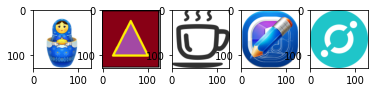

In [35]:
import matplotlib.pyplot as plt #plotting the images

rows = 1
cols = 5
fig=plt.figure()

j = 1

for i in im:
  fig.add_subplot(1, 5, j)
  plt.imshow(i)
  j = j+1

In [44]:
import numpy as np

#convert to arrays, get rid of alpha channel (pixels stored in RGBA order)
im_arrays = []
j = 0
for i in im:
  temp_arr = np.asarray(i)
  im_arrays.append(temp_arr[:,:,0:3])
  print(im_arrays[j].shape)
  j = j + 1

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [38]:
#printing the RGB arrays of the images
for i in im_arrays:
  print(i)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

In [66]:
#calculate mean and variance for the respective channels
R = np.empty((128,128), float)
G = np.empty((128,128), float)
B = np.empty((128,128), float)
for i in im_arrays:
  R = np.concatenate((R, i[:,:,0])) 
  G = np.concatenate((G, i[:,:,1]))
  B = np.concatenate((B, i[:,:,2]))

R = R[128:640,:]
G = G[128:640,:]
B = B[128:640,:]

print(R.shape)

#means
Red_mean = R.mean()
Red_var = R.std()

Green_mean = G.mean()
Green_var = G.std()

Blue_mean = B.mean()
Blue_var = B.std()

print(Red_mean, Green_mean, Blue_mean, Red_var, Green_var, Blue_var)

(512, 128)
158.13038635253906 144.4301300048828 164.62229919433594 95.90346862189394 103.94232192719853 97.84516974595167


In [89]:
#convert database to standard distribution
im_arrays_std = []
Rstd = (R - Red_mean) / Red_var
Gstd = (G - Green_mean) / Green_var
Bstd = (B - Blue_mean) / Blue_var

Reds_mean = Rstd.mean()
Reds_var = Rstd.std()

Greens_mean = Gstd.mean()
Greens_var = Gstd.std()

Blues_mean = Bstd.mean()
Blues_var = Bstd.std()

print(Reds_mean, Greens_mean, Blues_mean, Reds_var, Greens_var, Blues_var)




-3.849153922763637e-06 -2.993868568682001e-07 0.0001756883429398226 0.999999999992592 0.9999999999999553 0.999999984566803


The output is close to what what expected (0 mean and 1 deviation), considering the numerical limitations the output is acceptable.

In [82]:
type(R)

numpy.ndarray

In [78]:
im_arrays_std[1].shape


(0,)

In [88]:
a = np.array([[1, 2, 3], [4, 5, 6]])
am = a.mean()
astd = a.std()

print(am,astd)
astd_a = (a - am) / astd
print(astd_a)

ama = astd_a.mean()
astda = astd_a.std()

print(ama,astda)
a.shape

3.5 1.707825127659933
[[-1.46385011 -0.87831007 -0.29277002]
 [ 0.29277002  0.87831007  1.46385011]]
-3.700743415417188e-17 1.0


(2, 3)

In [107]:
#reading and analysis of audio file, based on https://www.kaggle.com/msripooja/steps-to-convert-audio-clip-to-spectrogram
from scipy.io import wavfile 
import numpy as np

soundUploaded = files.upload() # uploading images from computer
AudioName = "sampleWav1.wav" # Audio File
fs, Audiodata = wavfile.read(AudioName)


Saving sampleWav1.wav to sampleWav1.wav


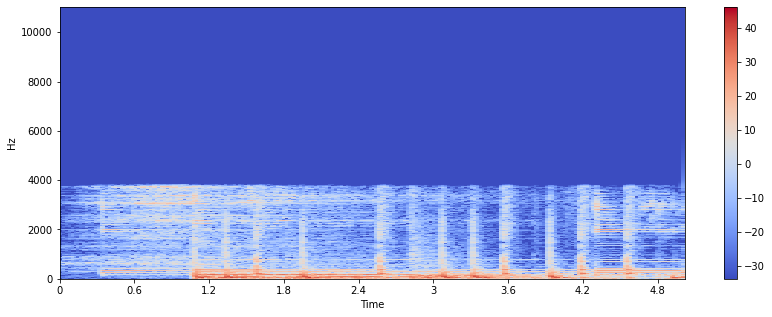

In [114]:

import librosa
import librosa.display

x, sr = librosa.load(AudioName)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [122]:
#downloading and analysing a wikipedia page, based on https://pythonspot.com/matplotlib-bar-chart/ and https://stackoverflow.com/questions/26284526/extract-text-from-wikipedia-html-using-python

from bs4 import BeautifulSoup
import requests

respond = requests.get("https://en.wikipedia.org/wiki/Deep_learning")
soup = BeautifulSoup(respond.text)
#print(soup)
l = soup.find_all('p')
for i in l:
  print(i.text)


Deep learning  (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.[1][2][3]

Deep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.[4][5][6]

Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains.  Specifically, neural networ

In [125]:
#convert to string

paragraphs = []
for x in l:
    paragraphs.append(str(x))

In [126]:
#create string of alphabet
import string
alphabet = string.ascii_lowercase
print(alphabet)

abcdefghijklmnopqrstuvwxyz


In [129]:
#count letters
numletters = []
for letter in alphabet:
  numletter_temp = 0
  for paragraph in paragraphs:
      numletter_temp = numletter_temp + paragraph.count(letter)
  numletters.append(numletter_temp)

print(numletters)


[5429, 556, 3035, 1892, 9149, 1996, 1208, 2004, 5361, 32, 656, 2678, 1283, 4436, 3543, 2004, 22, 4725, 3965, 5172, 1830, 471, 885, 135, 647, 107]


In [130]:
letters = []
for letter in alphabet:
  letters.append(letter)

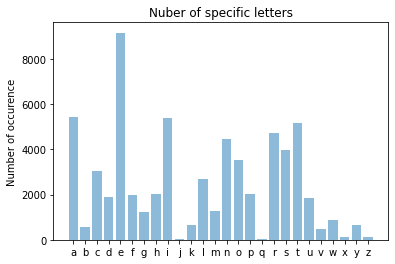

In [131]:
#display results on a column diagram
y_pos = np.arange(len(letters))

plt.bar(y_pos, numletters, align='center', alpha=0.5)
plt.xticks(y_pos, letters)
plt.ylabel('Number of occurence')
plt.title('Nuber of specific letters')

plt.show()